In [40]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
np.random.seed(42)

In [42]:
mnist=fetch_openml("mnist_784", version=1, as_frame=False)

In [43]:
X=mnist['data']
y=mnist['target']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [46]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52500, 784) (52500,) (17500, 784) (17500,)


In [69]:
y_train=y_train.astype('int64')

In [98]:
y_test=y_test.astype('int64')

In [70]:
y_train

array([3, 2, 8, ..., 1, 0, 0])

In [60]:
X_train=X_train/255
X_test=X_test/255

In [61]:
#CNN에 적용시키기 위하여 4차원으로 변형
X_train=X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test=X_test.reshape((X_test.shape[0], 28, 28, 1))

In [62]:
from tensorflow.keras import layers, models

In [73]:
CNN_model=models.Sequential([
    #채널 32
    layers.Conv2D(32, kernel_size=(5,5), padding='same', input_shape=(28,28,1),activation='relu', strides=(1,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [74]:
CNN_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 flatten_10 (Flatten)        (None, 3136)            

In [75]:
CNN_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [109]:
hist=CNN_model.fit(X_train, y_train, epochs=50, verbose = 1)

Epoch 1/50
1641/1641 [==============================] - 7s 4ms/step - loss: 0.0379 - accuracy: 0.9874
Epoch 2/50
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0314 - accuracy: 0.9897
Epoch 3/50
1641/1641 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9902
Epoch 4/50
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 5/50
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0214 - accuracy: 0.9930
Epoch 6/50
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 7/50
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 8/50
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 9/50
1641/1641 [==============================] - 6s 4ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 10/50
1641/1641 [==============================] - 6s 3ms/step - loss: 0.012

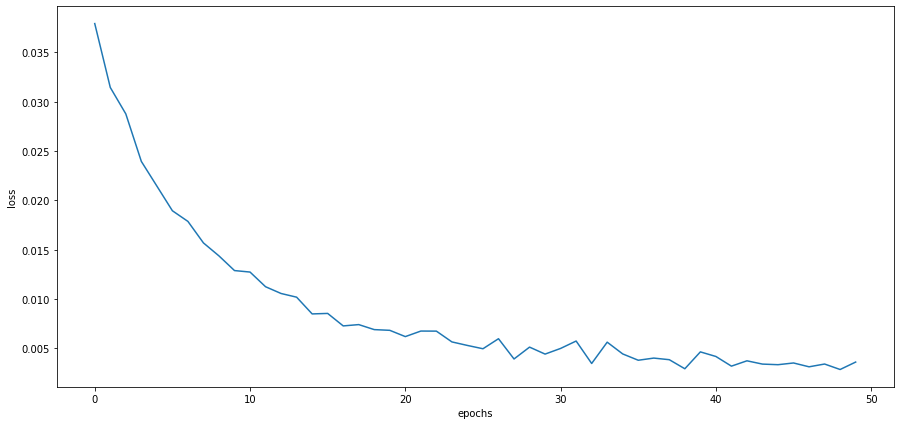

In [110]:
plt.figure(figsize=(15,7))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

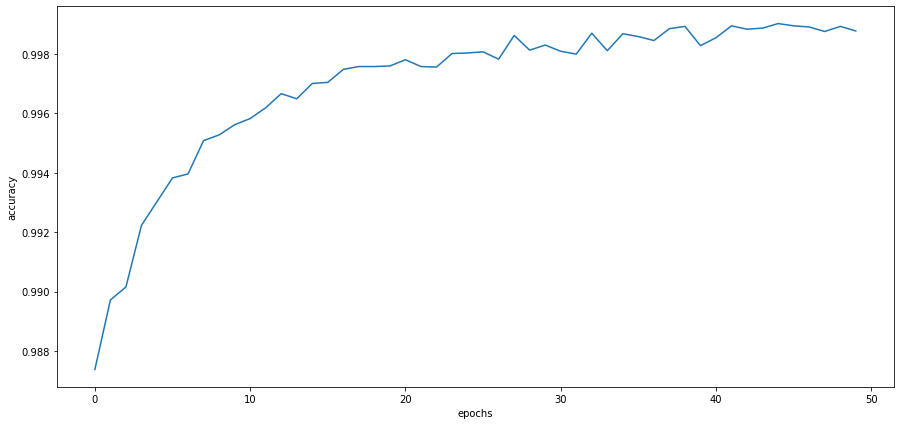

In [111]:
plt.figure(figsize=(15,7))
plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [112]:
X_test_predict=CNN_model.predict(X_test)

In [113]:
X_test_predict.shape

(17500, 10)

In [114]:
info=[]
for i in range(len(X_test_predict)):
    for j in range(10):
        if max(X_test_predict[i])==X_test_predict[i][j]:
            info.append(j)

In [115]:
count=0
for i in range(17500):
    if y_test[i]==info[i]:
        count+=1

In [116]:
print(count/17500)

0.9890285714285715
